In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

df = pd.read_csv("fifa_data.csv")
df.shape


(18207, 89)

In [2]:
df = df.drop(['Unnamed: 0', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall', 'Potential', 'Club', 'Club Logo', 'Value',
              'Wage','Special', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
              'Body Type', 'Real Face', 'Jersey Number', 'Joined', 'Loaned From', 'Contract Valid Until', 'Height',
              'Weight', 'LS', 'ST', 'RS', 'LW', 'LF', 'CF', 'RF', 'RW', 'LAM', 'CAM', 'RAM', 'LM', 'LCM', 'CM', 'RCM',
              'RM', 'LWB', 'LDM', 'CDM', 'RDM', 'RWB', 'LB', 'LCB', 'CB', 'RCB', 'RB', 'GKDiving', 'GKHandling', 
              'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'], axis = 1)


In [3]:
df.shape
df.isnull().sum()

ID                  0
Name                0
Position           60
Crossing           48
Finishing          48
HeadingAccuracy    48
ShortPassing       48
Volleys            48
Dribbling          48
Curve              48
FKAccuracy         48
LongPassing        48
BallControl        48
Acceleration       48
SprintSpeed        48
Agility            48
Reactions          48
Balance            48
ShotPower          48
Jumping            48
Stamina            48
Strength           48
LongShots          48
Aggression         48
Interceptions      48
Positioning        48
Vision             48
Penalties          48
Composure          48
Marking            48
StandingTackle     48
SlidingTackle      48
dtype: int64

In [4]:
df = df.dropna()
df.isnull().sum()

ID                 0
Name               0
Position           0
Crossing           0
Finishing          0
HeadingAccuracy    0
ShortPassing       0
Volleys            0
Dribbling          0
Curve              0
FKAccuracy         0
LongPassing        0
BallControl        0
Acceleration       0
SprintSpeed        0
Agility            0
Reactions          0
Balance            0
ShotPower          0
Jumping            0
Stamina            0
Strength           0
LongShots          0
Aggression         0
Interceptions      0
Positioning        0
Vision             0
Penalties          0
Composure          0
Marking            0
StandingTackle     0
SlidingTackle      0
dtype: int64

In [5]:
df['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
RAM      21
LAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [6]:
# Convert the current 27 positions into 4 main position disciplines, Attacker, Midfielder, Defender, Goalkeeper
att = dict.fromkeys(['ST', 'LW', 'RW', 'LS', 'RS', 'CF', 'RF', 'LF'], 'Attacker')
mid = dict.fromkeys(['CM', 'RM', 'LM', 'CAM', 'CDM', 'LCM', 'RCM', 'RDM', 'LDM', 'RAM', 'LAM'], 'Midfielder')
dfnc = dict.fromkeys(['CB', 'LB', 'RB', 'RCB', 'LCB', 'RWB', 'LWB' ], 'Defender')
df.Position.replace('GK', 'Goalkeeper', inplace=True)
df.Position.replace(att, inplace=True)
df.Position.replace(mid, inplace=True)
df.Position.replace(dfnc, inplace=True)
df['Position'].value_counts()

Midfielder    6838
Defender      5866
Attacker      3418
Goalkeeper    2025
Name: Position, dtype: int64

In [7]:
# Check for duplicate players using the players unique player ID
df.duplicated('ID').sum()

0

In [8]:
# Nominate the features
feature_cols = ['Crossing','Finishing','HeadingAccuracy','ShortPassing','Volleys','Dribbling','Curve','FKAccuracy',
                'LongPassing','BallControl','Acceleration','SprintSpeed','Agility','Reactions','Balance','ShotPower',
                'Jumping','Stamina','Strength','LongShots','Aggression','Interceptions','Positioning','Vision',
                'Penalties','Composure','Marking','StandingTackle','SlidingTackle']

# Assign the feature data
X = df[feature_cols]
print(X.shape)

# Assign the outcomes
y = df['Position']
print(y.shape)
print(X.head())

(18147, 29)
(18147,)
   Crossing  Finishing  HeadingAccuracy  ShortPassing  Volleys  Dribbling  \
0      84.0       95.0             70.0          90.0     86.0       97.0   
1      84.0       94.0             89.0          81.0     87.0       88.0   
2      79.0       87.0             62.0          84.0     84.0       96.0   
3      17.0       13.0             21.0          50.0     13.0       18.0   
4      93.0       82.0             55.0          92.0     82.0       86.0   

   Curve  FKAccuracy  LongPassing  BallControl  ...  LongShots  Aggression  \
0   93.0        94.0         87.0         96.0  ...       94.0        48.0   
1   81.0        76.0         77.0         94.0  ...       93.0        63.0   
2   88.0        87.0         78.0         95.0  ...       82.0        56.0   
3   21.0        19.0         51.0         42.0  ...       12.0        38.0   
4   85.0        83.0         91.0         91.0  ...       91.0        76.0   

   Interceptions  Positioning  Vision  Penaltie

In [9]:
def plot_train_time_curve(train_sizes, fit_times, title, alpha=0.1):
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    plt.plot(train_sizes, fit_times_mean, label='train points', color='blue', marker='o')
    plt.fill_between(train_sizes, fit_times_mean + fit_times_std,
                     fit_times_mean - fit_times_std, color='blue', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('Training time')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [10]:
def plot_validation_curve(param_range, train_scores, test_scores, x_label, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(param_range, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(param_range, train_mean + train_std,
                 train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(param_range, test_mean, label='validation score', color='red', marker='o')
    plt.fill_between(param_range, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.grid(ls='--')
    plt.xlabel(x_label)
    plt.ylabel('F1 score')
    plt.legend(loc='best')
    plt.show()



In [11]:
def plot_learning_curve(train_sizes, train_scores, test_scores, title, alpha=0.1):
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)
    plt.plot(train_sizes, train_mean, label='train score', color='blue', marker='o')
    plt.fill_between(train_sizes, train_mean + train_std,
                     train_mean - train_std, color='blue', alpha=alpha)
    plt.plot(train_sizes, test_mean, label='validation score', color='red', marker='o')

    plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, color='red', alpha=alpha)
    plt.title(title)
    plt.xlabel('Number of training points')
    plt.ylabel('F1 score')
    plt.grid(ls='--')
    plt.legend(loc='best')
    plt.show()


In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.model_selection import learning_curve,validation_curve
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector 


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=40)

scaler=StandardScaler()
data_prep=make_column_transformer((scaler,make_column_selector(dtype_include='float64')))
s_kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=40)


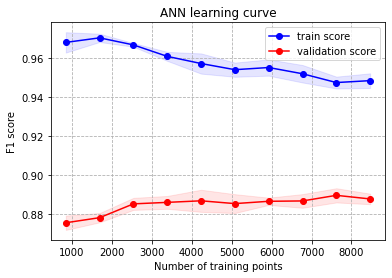

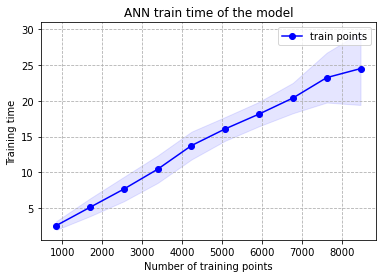

ANN: F1 score= 0.885
[[ 801    6    0  218]
 [   5 1641    0  114]
 [   0    0  608    0]
 [ 202  159    0 1691]]
              precision    recall  f1-score   support

    Attacker       0.79      0.78      0.79      1025
    Defender       0.91      0.93      0.92      1760
  Goalkeeper       1.00      1.00      1.00       608
  Midfielder       0.84      0.82      0.83      2052

    accuracy                           0.87      5445
   macro avg       0.88      0.88      0.88      5445
weighted avg       0.87      0.87      0.87      5445



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 40,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [13]:
from sklearn.neural_network import MLPClassifier

pipeline = make_pipeline(data_prep,MLPClassifier(random_state=40))

train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')


from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate f1 score
y_pred = pipeline.predict(X_test)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_test, y_pred, average="macro"))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pipeline.steps[1][1].get_params()

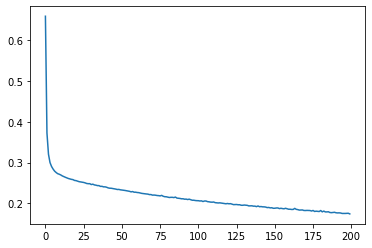

In [15]:
import matplotlib.pyplot as plt

plt.plot(pipeline.steps[1][1].loss_curve_)
plt.show()

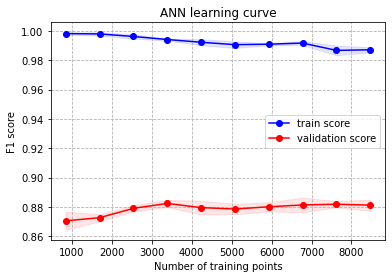

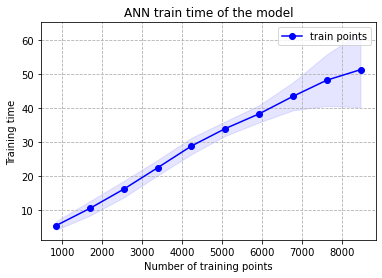

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN: F1 score= 0.879
[[ 780    6    0  239]
 [   6 1634    0  120]
 [   0    0  608    0]
 [ 208  154    0 1690]]
              precision    recall  f1-score   support

    Attacker       0.78      0.76      0.77      1025
    Defender       0.91      0.93      0.92      1760
  Goalkeeper       1.00      1.00      1.00       608
  Midfielder       0.82      0.82      0.82      2052

    accuracy                           0.87      5445
   macro avg       0.88      0.88      0.88      5445
weighted avg       0.86      0.87      0.86      5445



{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (300,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 40,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [16]:
from sklearn.neural_network import MLPClassifier

pipeline = make_pipeline(data_prep,MLPClassifier(random_state=40, hidden_layer_sizes=(300,)))

train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')


from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate f1 score
y_pred = pipeline.predict(X_test)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_test, y_pred, average="macro"))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pipeline.steps[1][1].get_params()

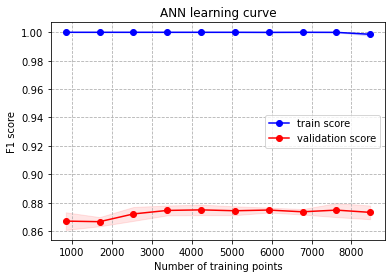

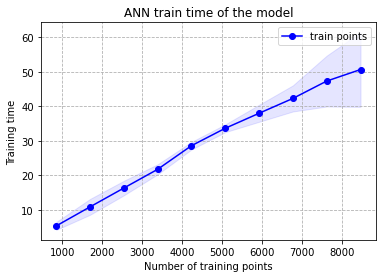

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


ANN: F1 score= 0.867
[[ 801    4    0  220]
 [   7 1577    0  176]
 [   0    0  608    0]
 [ 264  152    0 1636]]
              precision    recall  f1-score   support

    Attacker       0.75      0.78      0.76      1025
    Defender       0.91      0.90      0.90      1760
  Goalkeeper       1.00      1.00      1.00       608
  Midfielder       0.81      0.80      0.80      2052

    accuracy                           0.85      5445
   macro avg       0.87      0.87      0.87      5445
weighted avg       0.85      0.85      0.85      5445



{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100, 100),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 200,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 40,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

In [14]:
from sklearn.neural_network import MLPClassifier

pipeline = make_pipeline(data_prep,MLPClassifier(random_state=40, hidden_layer_sizes=(100,100)))

train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')


from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate f1 score
y_pred = pipeline.predict(X_test)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_test, y_pred, average="macro"))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

pipeline.steps[1][1].get_params()

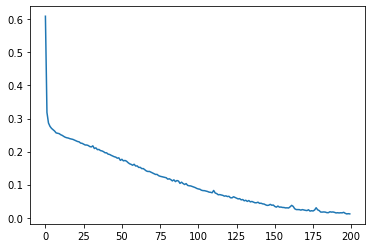

In [15]:
import matplotlib.pyplot as plt

plt.plot(pipeline.steps[1][1].loss_curve_)
plt.show()

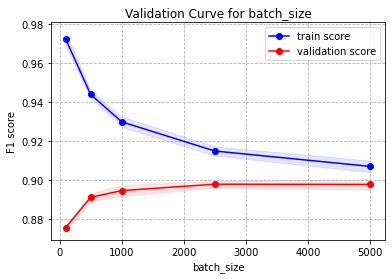

In [25]:
from sklearn.model_selection import validation_curve
batch_sizes= [100,500,1000,2500,5000]
pipeline = make_pipeline(data_prep,MLPClassifier(random_state=40,max_iter=300))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_train, y=y_train, param_name="mlpclassifier__batch_size", param_range=batch_sizes,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(batch_sizes, train_scores, test_scores, 'batch_size', title="Validation Curve for batch_size",alpha=0.1)

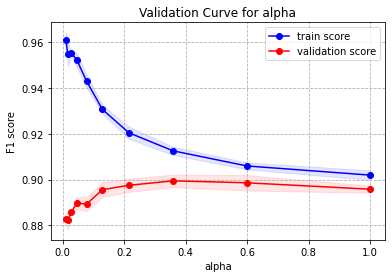

In [19]:
from sklearn.model_selection import validation_curve
alphas=np.logspace(-2, 0, 10)
pipeline = make_pipeline(data_prep,MLPClassifier(random_state=40,max_iter=300))
train_scores, test_scores = validation_curve(
        estimator=pipeline, X=X_train, y=y_train, param_name="mlpclassifier__alpha", param_range=alphas,
        cv=s_kfold, scoring="f1_macro", n_jobs=-1)
plot_validation_curve(alphas, train_scores, test_scores, 'alpha', title="Validation Curve for alpha", alpha=0.1)

In [16]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
pipeline = make_pipeline(data_prep,MLPClassifier(max_iter=300))
hidden_layer_sizes = [(50,50), (50,50,50),(25,)]
alphas=np.logspace(-2, 1, 10)
learning_rate=['constant','adaptive']
parameters = dict(mlpclassifier__hidden_layer_sizes=hidden_layer_sizes,mlpclassifier__alpha=alphas,mlpclassifier__learning_rate=learning_rate)
rd_search_cv = RandomizedSearchCV(pipeline, parameters,cv=s_kfold, n_iter=100,scoring='f1_macro')
rd_search_cv.fit(X_train, y_train)
print("Tuned MLP best params: {}".format(rd_search_cv.best_params_))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:278: UserWarning: The total space of parameters 60 is smaller than n_iter=100. Running 60 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_networ

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  warnings.warn(


Tuned MLP best params: {'mlpclassifier__learning_rate': 'constant', 'mlpclassifier__hidden_layer_sizes': (25,), 'mlpclassifier__alpha': 0.21544346900318834}


In [16]:
grid_search_cv.best_estimator_.steps[1][1].get_params()


{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 23,
 'p': 2,
 'weights': 'distance'}

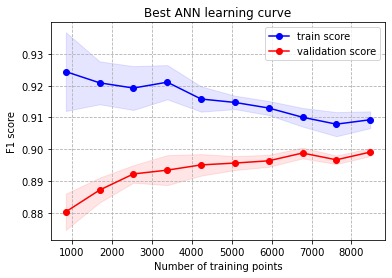

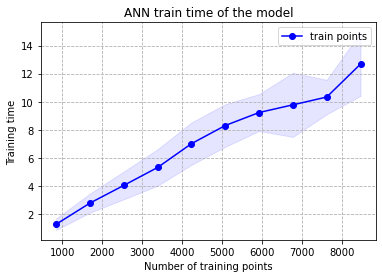

ANN: Predict Time= 0.002
ANN: F1 score= 0.897
              precision    recall  f1-score   support

    Attacker       0.87      0.74      0.80      1025
    Defender       0.93      0.93      0.93      1760
  Goalkeeper       1.00      1.00      1.00       608
  Midfielder       0.83      0.89      0.86      2052

    accuracy                           0.89      5445
   macro avg       0.91      0.89      0.90      5445
weighted avg       0.89      0.89      0.89      5445

[[ 761    5    0  259]
 [   0 1635    0  125]
 [   0    0  608    0]
 [ 109  119    0 1824]]


In [14]:
from sklearn.neural_network import MLPClassifier
pipeline = make_pipeline(data_prep,MLPClassifier(alpha=0.3,learning_rate='constant',solver='adam',hidden_layer_sizes=(25,)))
train_sizes, train_scores, test_scores,fit_times, _  = learning_curve(estimator=pipeline, X=X_train, y=y_train,
                                                       cv=s_kfold,scoring='f1_macro',
                                                       train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1,return_times=True)
                                                        
plot_learning_curve(train_sizes, train_scores, test_scores,'Best ANN learning curve')
plot_train_time_curve(train_sizes, fit_times, 'ANN train time of the model')

from sklearn.metrics import f1_score, classification_report, confusion_matrix
pipeline.fit(X_train, y_train)

# calculate f1 score
import time
start = time.time()
y_pred = pipeline.predict(X_test)
diff=time.time() - start
print('ANN: Predict Time= %.3f' %  diff)
# summarize scores
print('ANN: F1 score= %.3f' %  f1_score(y_test, y_pred, average="macro"))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

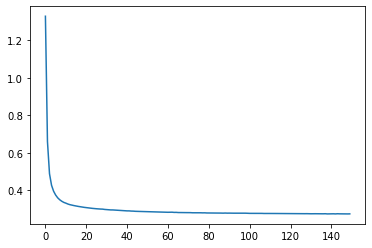

In [23]:
import matplotlib.pyplot as plt

plt.plot(pipeline.steps[1][1].loss_curve_)
plt.show()